In [1]:
import qiskit
import numpy as np, matplotlib.pyplot as plt

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import np_utils
import keras
from keras.datasets import mnist
import classical_part
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_val, y_val = x_train[50:60,:], y_train[50:60]
x_train, y_train = x_train[:50,:], y_train[:50]

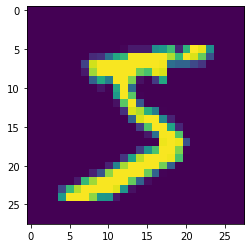

In [21]:
plt.imshow(x_train[0])

In [22]:
# 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
X_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
X_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

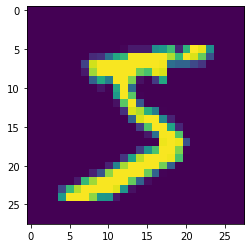

In [23]:
plt.imshow(x_train[0])

In [40]:
# # 3. Reshape lại dữ liệu cho đúng kích thước mà keras yêu cầu
# xq_train = []
# for x_train_item in x_train:
#     xq_train.append(classical_part.quantum_model(x_train_item))
# xq_test = []
# for x_test_item in x_train:
#     xq_test.append(classical_part.quantum_model(x_test_item))
xq_train = []
for x_train_item in x_train:
    xq_train.append(classical_part.quantum_model(x_train_item))
xq_train = np.array(xq_train)

xq_val = []
for x_val_item in x_val:
    xq_val.append(classical_part.quantum_model(x_val_item))
xq_val = np.array(xq_val)

In [29]:
print(xq_val.shape)

(10, 14, 14, 4)


In [30]:
print(x_val.shape)

(10, 28, 28)


In [33]:
# 4. One hot encoding label (Y)
y_train = np_utils.to_categorical(y_train, 10)
y_val = np_utils.to_categorical(y_val, 10)
y_test = np_utils.to_categorical(y_test, 10)
print('Dữ liệu y ban đầu ', y_train[0])
print('Dữ liệu y sau one-hot encoding ',y_train[0])

Dữ liệu y ban đầu  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
Dữ liệu y sau one-hot encoding  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


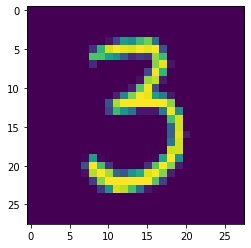

In [38]:
plt.imshow(x_val[0])

In [31]:
cmodel = classical_part.classical_model()
hmodel = classical_part.hybrid_model()

In [41]:
cmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
H1 = cmodel.fit(x_train, y_train, validation_data=(x_val, y_val),
          batch_size=4, epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 1s 40ms/step - loss: 2.3905 - accuracy: 0.1400 - val_loss: 2.3180 - val_accuracy: 0.1000
Epoch 2/10
13/13 [==============================] - 0s 19ms/step - loss: 2.2785 - accuracy: 0.1400 - val_loss: 2.3143 - val_accuracy: 0.1000
Epoch 3/10
13/13 [==============================] - 0s 34ms/step - loss: 2.2565 - accuracy: 0.2400 - val_loss: 2.2734 - val_accuracy: 0.4000
Epoch 4/10
13/13 [==============================] - 0s 29ms/step - loss: 2.1865 - accuracy: 0.1600 - val_loss: 2.1899 - val_accuracy: 0.4000
Epoch 5/10
13/13 [==============================] - 0s 28ms/step - loss: 2.0041 - accuracy: 0.4200 - val_loss: 1.8839 - val_accuracy: 0.6000
Epoch 6/10
13/13 [==============================] - 0s 32ms/step - loss: 1.6345 - accuracy: 0.6200 - val_loss: 1.5276 - val_accuracy: 0.6000
Epoch 7/10
13/13 [==============================] - 0s 25ms/step - loss: 1.0322 - accuracy: 0.8200 - val_loss: 1.1243 - val_accuracy: 0.7000
Epoch 8/10
13

In [42]:
hmodel.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
H2 = hmodel.fit(xq_train, y_train, validation_data=(xq_val, y_val),
          batch_size=4, epochs=10, verbose=1)

Epoch 1/10
13/13 [==============================] - 1s 31ms/step - loss: 2.3723 - accuracy: 0.1600 - val_loss: 2.2869 - val_accuracy: 0.2000
Epoch 2/10
13/13 [==============================] - 0s 7ms/step - loss: 2.1769 - accuracy: 0.2400 - val_loss: 2.1671 - val_accuracy: 0.2000
Epoch 3/10
13/13 [==============================] - 0s 8ms/step - loss: 2.0805 - accuracy: 0.2600 - val_loss: 2.1106 - val_accuracy: 0.2000
Epoch 4/10
13/13 [==============================] - 0s 8ms/step - loss: 1.9889 - accuracy: 0.4400 - val_loss: 2.0978 - val_accuracy: 0.3000
Epoch 5/10
13/13 [==============================] - 0s 12ms/step - loss: 1.9129 - accuracy: 0.4400 - val_loss: 2.0514 - val_accuracy: 0.2000
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 1.8452 - accuracy: 0.6400 - val_loss: 2.0547 - val_accuracy: 0.4000
Epoch 7/10
13/13 [==============================] - 0s 9ms/step - loss: 1.7651 - accuracy: 0.6600 - val_loss: 1.9835 - val_accuracy: 0.4000
Epoch 8/10
13/13 [

In [14]:
results = model.evaluate(X_test, Y_test, batch_size=128)
print("test loss, test acc:", results)

79/79 [==============================] - 6s 71ms/step - loss: 0.6002 - accuracy: 0.8334
test loss, test acc: [0.6002498269081116, 0.8334000110626221]


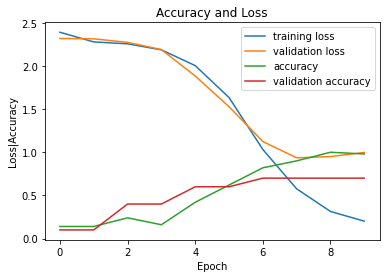

In [43]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H1.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H1.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H1.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H1.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

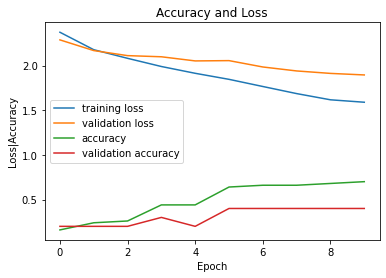

In [44]:
# 8. Vẽ đồ thị loss, accuracy của traning set và validation set
fig = plt.figure()
numOfEpoch = 10
plt.plot(np.arange(0, numOfEpoch), H2.history['loss'], label='training loss')
plt.plot(np.arange(0, numOfEpoch), H2.history['val_loss'], label='validation loss')
plt.plot(np.arange(0, numOfEpoch), H2.history['accuracy'], label='accuracy')
plt.plot(np.arange(0, numOfEpoch), H2.history['val_accuracy'], label='validation accuracy')
plt.title('Accuracy and Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss|Accuracy')
plt.legend()

In [48]:
H1.history['loss']
np.savetxt('h1history.txt', H1.history['loss'])

In [46]:
H2.history['loss']

[2.3723416328430176,
 2.1769156455993652,
 2.0804860591888428,
 1.9888917207717896,
 1.9128963947296143,
 1.8452332019805908,
 1.7650926113128662,
 1.6856759786605835,
 1.616266131401062,
 1.5889724493026733]